# Matin Ghorbani 6.7.Assignment
---

## Import Dependencies

In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from perceptron_surgical import Perceptron
from tqdm import tqdm
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

## Fit an object-oriented perceptron algorithm on the surgical dataset for classification

In [12]:
df = pd.read_csv("datasets/Surgical-deepnet.csv")
df.isnull().sum()

bmi                    0
Age                    0
asa_status             0
baseline_cancer        0
baseline_charlson      0
baseline_cvd           0
baseline_dementia      0
baseline_diabetes      0
baseline_digestive     0
baseline_osteoart      0
baseline_psych         0
baseline_pulmonary     0
ahrq_ccs               0
ccsComplicationRate    0
ccsMort30Rate          0
complication_rsi       0
dow                    0
gender                 0
hour                   0
month                  0
moonphase              0
mort30                 0
mortality_rsi          0
race                   0
complication           0
dtype: int64

In [13]:
X = df.drop("complication", axis=1).copy().values
Y = df['complication'].copy().values

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)
X_train.shape, Y_train.shape, X_test.shape, Y_test.shape


((11708, 24), (11708,), (2927, 24), (2927,))

In [14]:
perceptron = Perceptron(input_length=24, learning_rate=0.001)
perceptron.fit(X_train, Y_train, 10, 'sigmoid')

100%|██████████| 10/10 [00:00<00:00, 13.70it/s]


## Plot loss in each epoch for train and test data

In [30]:
train_accuracies, test_accuracies = [], []
train_losses, test_losses = [], []
epochs = 40
model2 = Perceptron(24, 0.001)
for epoch in tqdm(range(epochs)):
    for x_train, y_train in zip(X_train, Y_train):
        y_pred = model2.activation(x_train @ model2.weights + model2.bias, 'sigmoid')
        error = y_pred - y_train
        model2.weights = model2.weights - model2.learning_rate * error * x_train
        model2.bias = model2.bias - model2.learning_rate * error

    train_loss, train_accuracy = model2.evaluate(X_train, Y_train, 'sigmoid')
    test_loss, test_accuracy = model2.evaluate(X_test, Y_test, 'sigmoid')
    train_accuracies.append(train_accuracy)
    test_accuracies.append(test_accuracy)
    train_losses.append(train_loss)
    test_losses.append(test_loss)


100%|██████████| 40/40 [00:23<00:00,  1.72it/s]


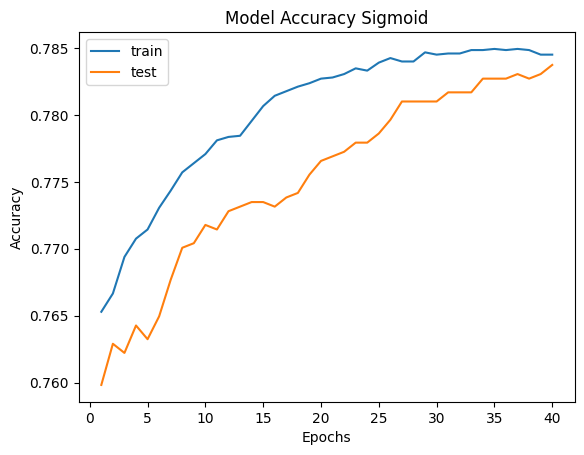

In [31]:
plt.plot(list(range(1, epochs + 1)), train_accuracies, label="train")
plt.plot(list(range(1, epochs + 1)), test_accuracies, label="test")
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title("Model Accuracy Sigmoid")
plt.legend()
plt.show()

## Plot loss in each epoch for train and test data

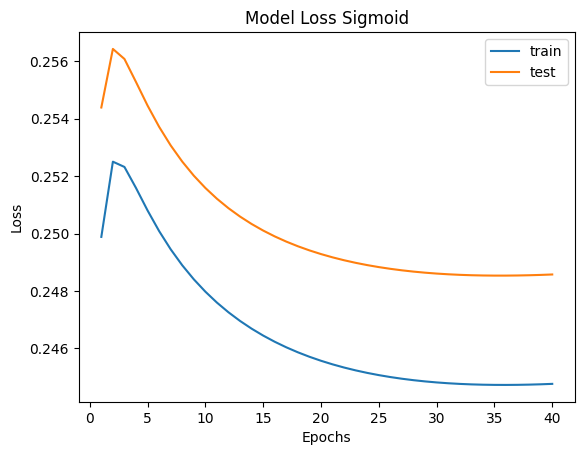

In [32]:
plt.plot(list(range(1, epochs + 1)), train_losses, label="train")
plt.plot(list(range(1, epochs + 1)), test_losses, label="test")
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title("Model Loss Sigmoid")
plt.legend()
plt.show()

## Calculate confusion matrix

Text(0.5, 1.0, 'Confusion Matrix')

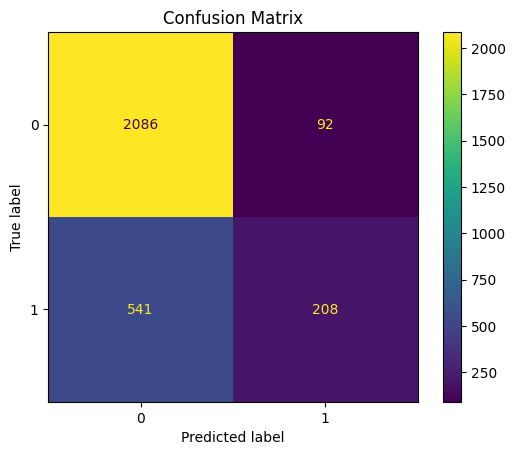

In [33]:
y_pred = model2.predict(X_test, 'sigmoid')
y_pred = np.where(y_pred < 0.5, 0, 1)
cm = confusion_matrix(Y_test, y_pred, labels=[0, 1])
CMD = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1])

CMD.plot()
plt.title('Confusion Matrix')

## Repeat the above steps with 5 different activation functions, e.g. sigmoid, tanh, relu, linear, etc.

### Relu

In [34]:
train_accuracies, test_accuracies = [], []
train_losses, test_losses = [], []
epochs = 40
model2 = Perceptron(24, 0.001)
for epoch in tqdm(range(epochs)):
    for x_train, y_train in zip(X_train, Y_train):
        y_pred = model2.activation(x_train @ model2.weights + model2.bias, 'relu')
        error = y_pred - y_train
        model2.weights = model2.weights - model2.learning_rate * error * x_train
        model2.bias = model2.bias - model2.learning_rate * error

    train_loss, train_accuracy = model2.evaluate(X_train, Y_train, 'relu')
    test_loss, test_accuracy = model2.evaluate(X_test, Y_test, 'relu')
    train_accuracies.append(train_accuracy)
    test_accuracies.append(test_accuracy)
    train_losses.append(train_loss)
    test_losses.append(test_loss)

100%|██████████| 40/40 [00:22<00:00,  1.81it/s]


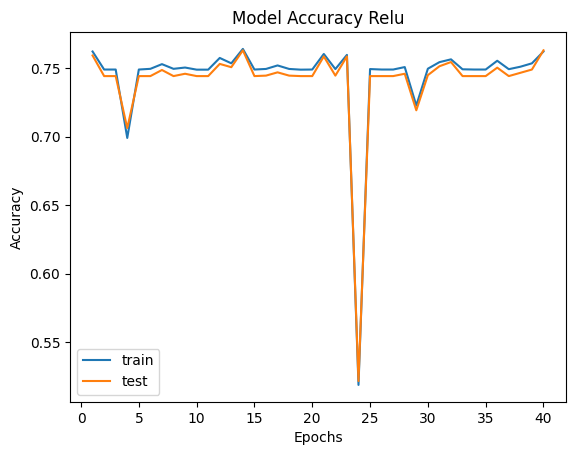

In [35]:
plt.plot(list(range(1, epochs + 1)), train_accuracies, label="train")
plt.plot(list(range(1, epochs + 1)), test_accuracies, label="test")
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title("Model Accuracy Relu")
plt.legend()
plt.show()

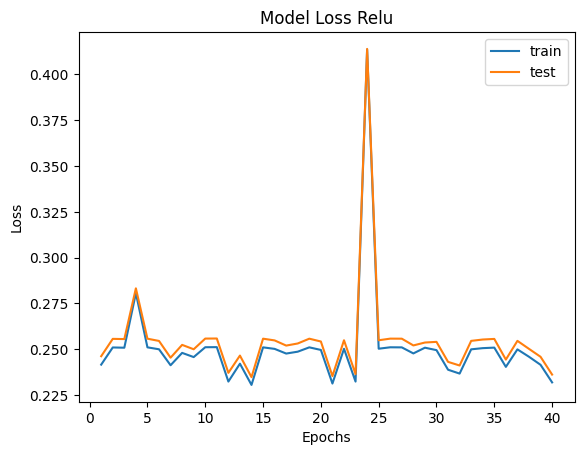

In [36]:
plt.plot(list(range(1, epochs + 1)), train_losses, label="train")
plt.plot(list(range(1, epochs + 1)), test_losses, label="test")
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title("Model Loss Relu")
plt.legend()
plt.show()

Text(0.5, 1.0, 'Confusion Matrix Relu')

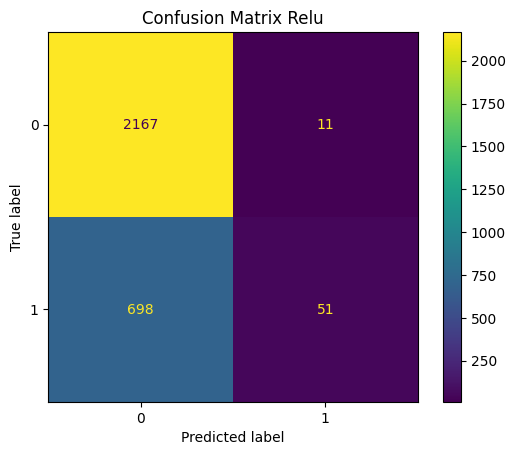

In [37]:
y_pred = model2.predict(X_test, 'relu')
y_pred = np.where(y_pred < 0.5, 0, 1)
cm = confusion_matrix(Y_test, y_pred, labels=[0, 1])
CMD = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1])

CMD.plot()
plt.title('Confusion Matrix Relu')

## tanh

In [38]:
train_accuracies, test_accuracies = [], []
train_losses, test_losses = [], []
epochs = 40
model2 = Perceptron(24, 0.001)
for epoch in tqdm(range(epochs)):
    for x_train, y_train in zip(X_train, Y_train):
        y_pred = model2.activation(x_train @ model2.weights + model2.bias, 'tanh')
        error = y_pred - y_train
        model2.weights = model2.weights - model2.learning_rate * error * x_train
        model2.bias = model2.bias - model2.learning_rate * error

    train_loss, train_accuracy = model2.evaluate(X_train, Y_train, 'tanh')
    test_loss, test_accuracy = model2.evaluate(X_test, Y_test, 'tanh')
    train_accuracies.append(train_accuracy)
    test_accuracies.append(test_accuracy)
    train_losses.append(train_loss)
    test_losses.append(test_loss)

100%|██████████| 40/40 [00:24<00:00,  1.60it/s]


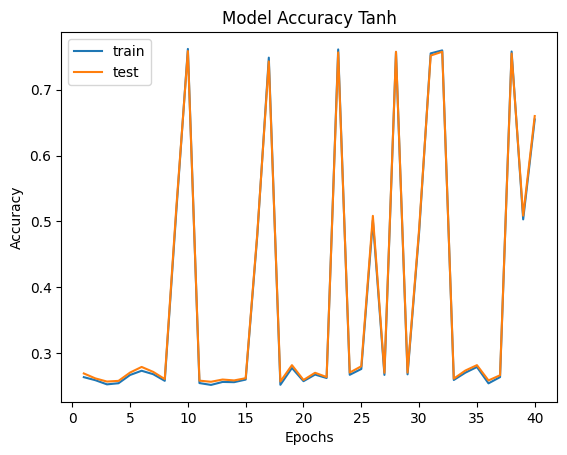

In [39]:
plt.plot(list(range(1, epochs + 1)), train_accuracies, label="train")
plt.plot(list(range(1, epochs + 1)), test_accuracies, label="test")
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title("Model Accuracy Tanh")
plt.legend()
plt.show()

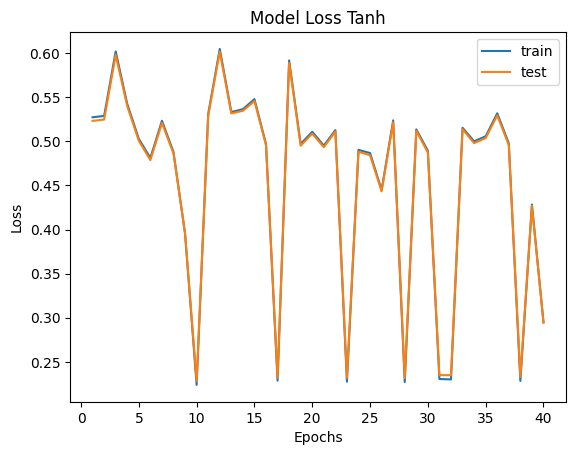

In [40]:
plt.plot(list(range(1, epochs + 1)), train_losses, label="train")
plt.plot(list(range(1, epochs + 1)), test_losses, label="test")
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title("Model Loss Tanh")
plt.legend()
plt.show()

Text(0.5, 1.0, 'Confusion Matrix Tanh')

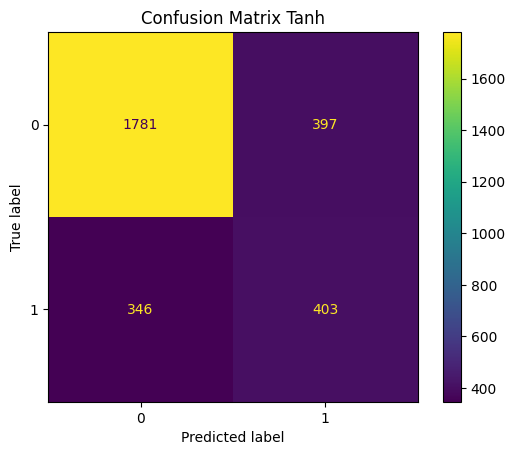

In [41]:
y_pred = model2.predict(X_test, 'tanh')
y_pred = np.where(y_pred < 0.5, 0, 1)
cm = confusion_matrix(Y_test, y_pred, labels=[0, 1])
CMD = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1])

CMD.plot()
plt.title('Confusion Matrix Tanh')

## unitstep

In [42]:
train_accuracies, test_accuracies = [], []
train_losses, test_losses = [], []
epochs = 40
model2 = Perceptron(24, 0.001)
for epoch in tqdm(range(epochs)):
    for x_train, y_train in zip(X_train, Y_train):
        y_pred = model2.activation(x_train @ model2.weights + model2.bias, 'unitstep')
        error = y_pred - y_train
        model2.weights = model2.weights - model2.learning_rate * error * x_train
        model2.bias = model2.bias - model2.learning_rate * error

    train_loss, train_accuracy = model2.evaluate(X_train, Y_train, 'unitstep')
    test_loss, test_accuracy = model2.evaluate(X_test, Y_test, 'unitstep')
    train_accuracies.append(train_accuracy)
    test_accuracies.append(test_accuracy)
    train_losses.append(train_loss)
    test_losses.append(test_loss)

100%|██████████| 40/40 [00:23<00:00,  1.69it/s]


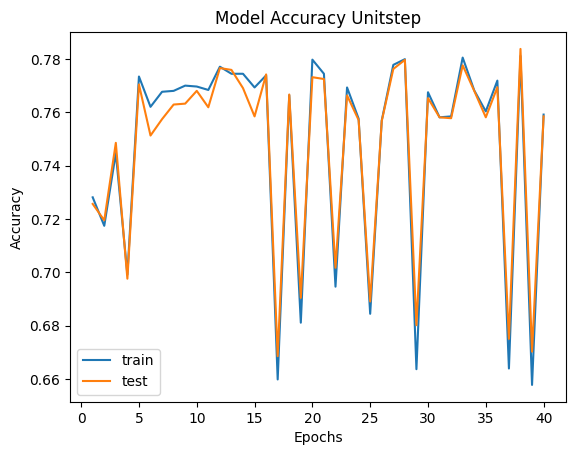

In [43]:
plt.plot(list(range(1, epochs + 1)), train_accuracies, label="train")
plt.plot(list(range(1, epochs + 1)), test_accuracies, label="test")
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title("Model Accuracy Unitstep")
plt.legend()
plt.show()

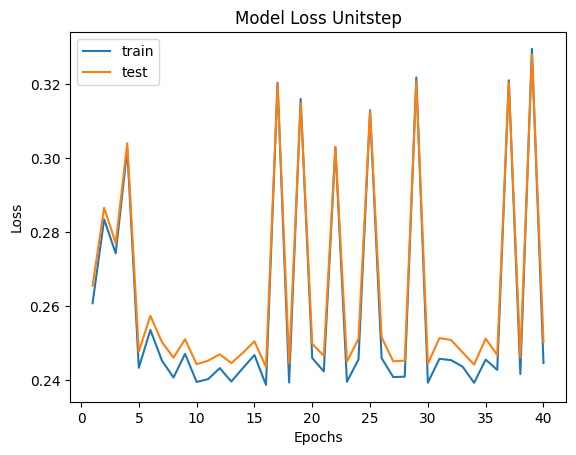

In [44]:
plt.plot(list(range(1, epochs + 1)), train_losses, label="train")
plt.plot(list(range(1, epochs + 1)), test_losses, label="test")
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title("Model Loss Unitstep")
plt.legend()
plt.show()

Text(0.5, 1.0, 'Confusion Matrix Unitstep')

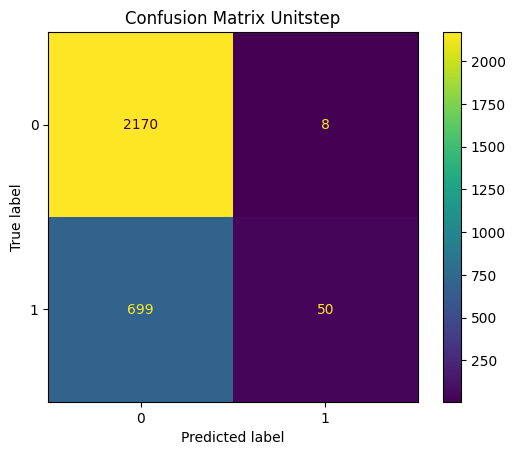

In [45]:
y_pred = model2.predict(X_test, 'unitstep')
y_pred = np.where(y_pred < 0.5, 0, 1)
cm = confusion_matrix(Y_test, y_pred, labels=[0, 1])
CMD = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1])

CMD.plot()
plt.title('Confusion Matrix Unitstep')

## sign

In [46]:
train_accuracies, test_accuracies = [], []
train_losses, test_losses = [], []
epochs = 40
model2 = Perceptron(24, 0.001)
for epoch in tqdm(range(epochs)):
    for x_train, y_train in zip(X_train, Y_train):
        y_pred = model2.activation(x_train @ model2.weights + model2.bias, 'sign')
        error = y_pred - y_train
        model2.weights = model2.weights - model2.learning_rate * error * x_train
        model2.bias = model2.bias - model2.learning_rate * error

    train_loss, train_accuracy = model2.evaluate(X_train, Y_train, 'sign')
    test_loss, test_accuracy = model2.evaluate(X_test, Y_test, 'sign')
    train_accuracies.append(train_accuracy)
    test_accuracies.append(test_accuracy)
    train_losses.append(train_loss)
    test_losses.append(test_loss)

100%|██████████| 40/40 [00:23<00:00,  1.70it/s]


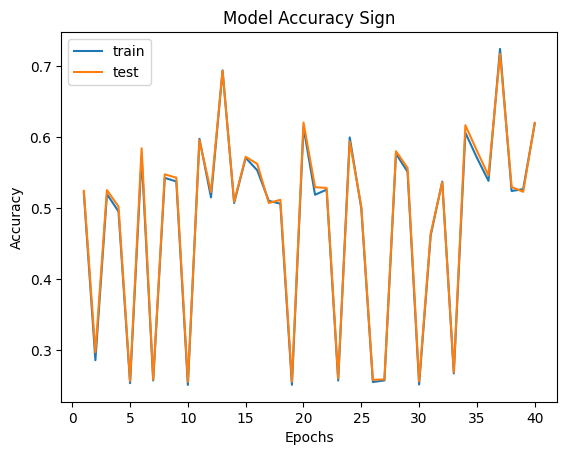

In [47]:
plt.plot(list(range(1, epochs + 1)), train_accuracies, label="train")
plt.plot(list(range(1, epochs + 1)), test_accuracies, label="test")
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title("Model Accuracy Sign")
plt.legend()
plt.show()

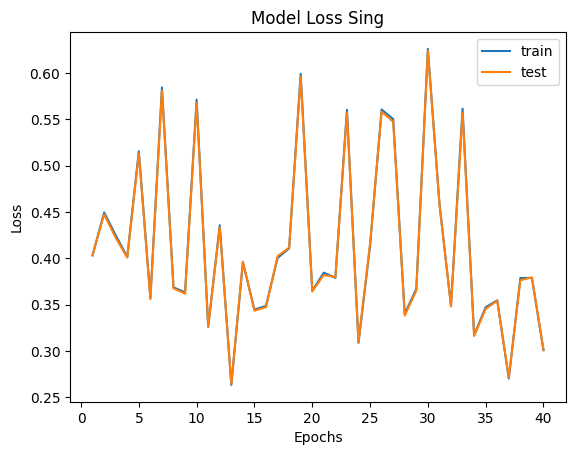

In [48]:
plt.plot(list(range(1, epochs + 1)), train_losses, label="train")
plt.plot(list(range(1, epochs + 1)), test_losses, label="test")
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title("Model Loss Sing")
plt.legend()
plt.show()

Text(0.5, 1.0, 'Confusion Matrix Sign')

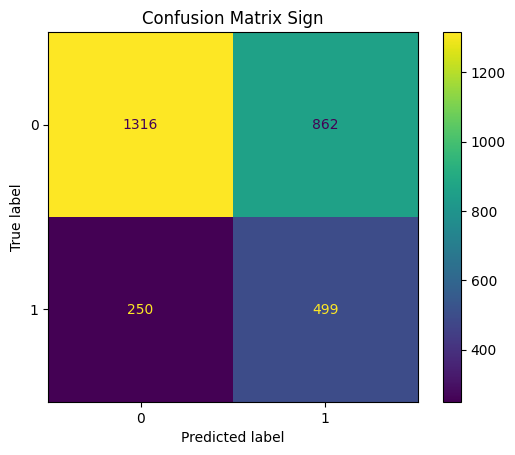

In [49]:
y_pred = model2.predict(X_test, 'unitstep')
y_pred = np.where(y_pred < 0.5, 0, 1)
cm = confusion_matrix(Y_test, y_pred, labels=[0, 1])
CMD = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1])

CMD.plot()
plt.title('Confusion Matrix Sign')